#### Goal & Instructions

Goal:

Download this dataset:

https://www.kaggle.com/btolar1/weka-german-credit

The dataset contains 1000 entries with 20 categorial/symbolic attributes. In this dataset,
each entry represents a person who takes a credit by a bank. Each person is classified as
good or bad (CLASS attribute) credit risk according to the set of attributes.

Using whichever methods and libraries you prefer, create a notebook with the following:
- Data preparation and Data exploration
- Identify the three most significant data features which drive the credit risk
- Modeling the credit risk
- Model validation and evaluation using the methods that you find correct for the proble

<img src="https://image.shutterstock.com/image-illustration/bank-credit-card-featuring-german-260nw-1968331744.jpg" alt="CNN-MNIST" width = "100"/>

#### Libraries

In [ ]:
# basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# working with operating system for data imports
import os

In [ ]:
# machine learning

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn import preprocessing # for scaling

#### Config

In [ ]:
# inline plotting
%matplotlib inline

RANDOM_STATE = 200 # seed to recreate results

#### Kaggle API

1. create API key in Kaggle https://www.kaggle.com/general/51898
2. export kaggle.json from Kaggle
3. open folder on LHS, go up to root folder
4. drag and drop kaggle.json into root folder
5. run cells below

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = "/root"

In [ ]:
# cd into content folder
%cd /content

/content


##### Import Data

In [ ]:
!kaggle datasets download -d btolar1/weka-german-credit

  0% 0.00/16.7k [00:00<?, ?B/s]
100% 16.7k/16.7k [00:00<00:00, 26.5MB/s]


In [ ]:
!unzip /content/weka-german-credit.zip -d review 

Archive:  /content/weka-german-credit.zip
  inflating: review/credit-g.csv     


In [ ]:
DE_credit = pd.read_csv("/content/review/credit-g.csv")

#### EDA

In [ ]:
# quick check of first 50 rows
DE_credit.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,none,4,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,none,4,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,none,2,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,none,4,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,none,2,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [ ]:
# get dimensions of data
DE_credit.shape

(1000, 21)

21 columns

In [ ]:
DE_credit.columns # column names for filtering below

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', ' other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       ' foreign_worker', 'class'],
      dtype='object')

In [ ]:
DE_credit.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
 other_payment_plans      object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
 foreign_worker           object
class                     object
dtype: object

lots of text fields - we will come back to this shortly

In [ ]:
# missing values ?
DE_credit.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
 other_payment_plans      0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
 foreign_worker           0
class                     0
dtype: int64

so no missing values

##### Single Feature Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8f4a23bd0>,
      dtype=object)

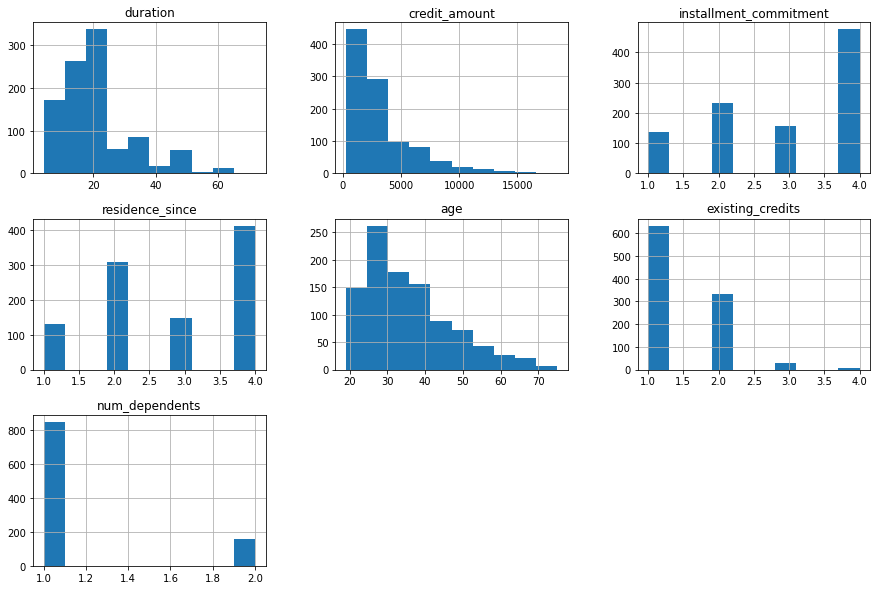

In [ ]:
DE_credit.hist(figsize=(15,10)) # histograms, enlarged to avoid squashing

In [ ]:
# isolate numerical columns only

DE_numFields = DE_credit.select_dtypes(exclude=object)

In [ ]:
DE_numFields.head()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
0,6,1169,4,4,67,2,1
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,2
3,42,7882,2,4,45,1,2
4,24,4870,3,4,53,2,2


In [ ]:
len(DE_numFields.columns)

7

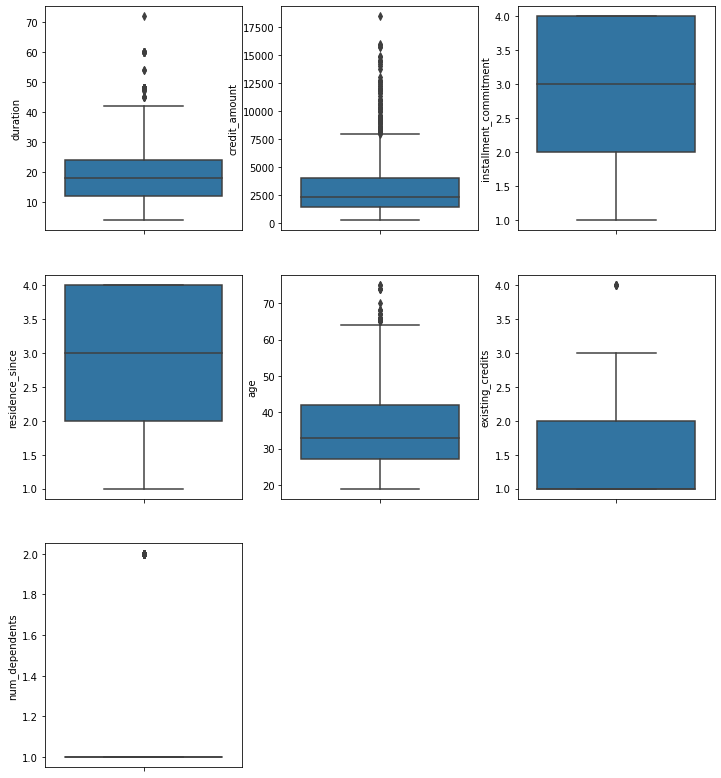

In [ ]:
# boxplots

plt.figure(figsize=(12,14))

for i in range(0,len(DE_numFields.columns)):
    plt.subplot(3,3,i+1) 
    g = sns.boxplot(y=DE_numFields.iloc[:,i])
    #g.set(yscale="log")

above are numeric features only (7), lets also take a look at text fields

#### Data Wrangling

##### Encoding

In [ ]:
DE_credit.select_dtypes(include=object).columns.shape

(14,)

14 columns 

In [ ]:
DE_TextFields = DE_credit.select_dtypes(include=object) # assign text columns to a new dataframe

In [ ]:
DE_TextFields.head() # quick check

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,<0,critical/other existing credit,radio/tv,no known savings,>=7,male single,none,real estate,none,own,skilled,yes,yes,good
1,0<=X<200,existing paid,radio/tv,<100,1<=X<4,female div/dep/mar,none,real estate,none,own,skilled,none,yes,bad
2,no checking,critical/other existing credit,education,<100,4<=X<7,male single,none,real estate,none,own,unskilled resident,none,yes,good
3,<0,existing paid,furniture/equipment,<100,4<=X<7,male single,guarantor,life insurance,none,for free,skilled,none,yes,good
4,<0,delayed previously,new car,<100,1<=X<4,male single,none,no known property,none,for free,skilled,none,yes,bad


In [ ]:
DE_TextFields.nunique() # frequency of values in each column

checking_status          4
credit_history           5
purpose                 10
savings_status           5
employment               5
personal_status          4
other_parties            3
property_magnitude       4
 other_payment_plans     3
housing                  3
job                      4
own_telephone            2
 foreign_worker          2
class                    2
dtype: int64

maximum number of values taken in any one column is 10, so for now (ASSUMPTION) lets do a straight forward ordinal encoding, swapping text values for a numeric value.

In [ ]:
DE_TextFields = DE_TextFields.astype("category")

# convert all text columns to category codes
for i in range(0, len(DE_TextFields.columns)):
  DE_TextFields.iloc[:,i] = DE_TextFields.iloc[:,i].cat.codes

DE_TextFields.head() # check implemented correctly

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,1,1,6,4,3,3,2,3,1,1,1,1,1,1
1,0,3,6,2,0,0,2,3,1,1,1,0,1,0
2,3,1,2,2,1,3,2,3,1,1,3,0,1,1
3,1,3,3,2,1,3,1,1,1,0,1,0,1,1
4,1,2,4,2,0,3,2,2,1,0,1,0,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8f3162190>,
      dtype=object)

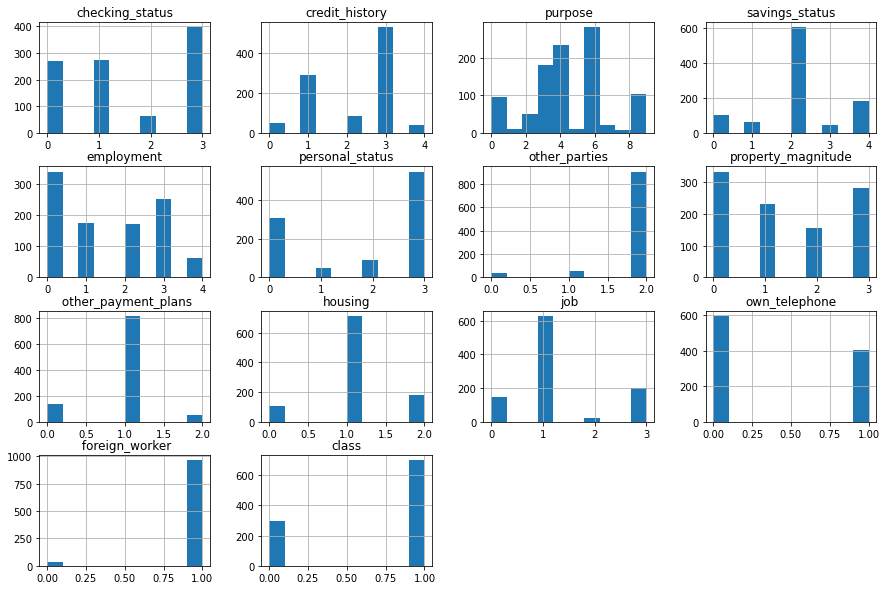

In [ ]:
DE_TextFields.hist(figsize=(15,10)) # histograms again, this time for encoded text fields

NB some imbalance in the target variable "class" - more "good" credit than "bad" credit customers

now join with the numerical dataframe

In [ ]:
DE_creditCleaned = pd.concat([DE_numFields,DE_TextFields],axis=1)

In [ ]:
DE_creditCleaned.head() # check

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,6,1169,4,4,67,2,1,1,1,6,4,3,3,2,3,1,1,1,1,1,1
1,48,5951,2,2,22,1,1,0,3,6,2,0,0,2,3,1,1,1,0,1,0
2,12,2096,2,3,49,1,2,3,1,2,2,1,3,2,3,1,1,3,0,1,1
3,42,7882,2,4,45,1,2,1,3,3,2,1,3,1,1,1,0,1,0,1,1
4,24,4870,3,4,53,2,2,1,2,4,2,0,3,2,2,1,0,1,0,1,0


In [ ]:
DE_creditCleaned.shape # and check again dimensions are same as original dataframe

(1000, 21)

#### Multi-Feature Analysis

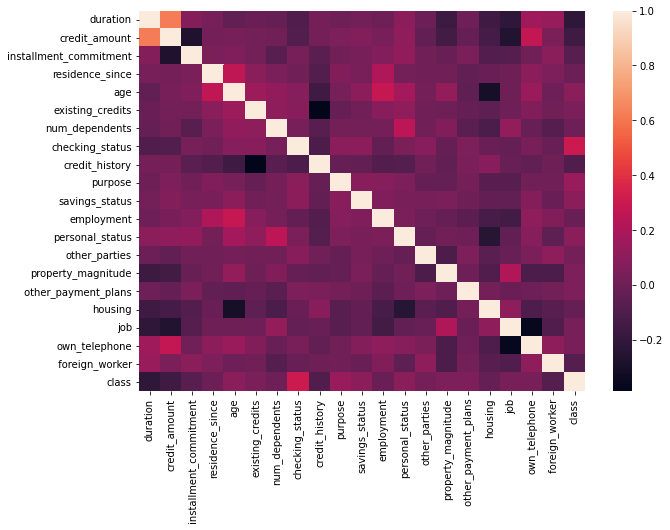

In [ ]:
# correlation plot

plt.subplots(figsize=(10, 7)) # enlarge the default plot size

#ploting the heatmap for correlation
ax = sns.heatmap(DE_creditCleaned.corr(), 
                 xticklabels=True, 
                 yticklabels=True)

some features look inversely correlated to our target variable "class":

- duration
- credit_amount

#### Feature Selection

have a look at what features might be good predictors for this moddel - its a classification with a mixture of numerical and categorical features and a categorical (ordinal) target variable, so lets try KBest with the ANOVA F Measure

Reference: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
# first split the data into features and target

# features
X = DE_creditCleaned.loc[:, DE_creditCleaned.columns != "class"] 
# target varible
y = DE_creditCleaned["class"]

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_classif, k=3)
# apply feature selection
X_selected = fs.fit_transform(X, y)
#X_selected

mask = fs.get_support() #list of booleans against best features/columns
new_features = [] # list of K best features

for bool, feature in zip(mask, X.columns):
    if bool:
        new_features.append(feature)

new_features # names of best features

['duration', 'credit_amount', 'checking_status']

so 'duration', 'credit_amount', 'checking_status' look like our three most significant features

#### Model Prep

In [ ]:
# split into training and test sets in ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=RANDOM_STATE)

In [ ]:
X_train.shape # check dimensions

(700, 20)

In [ ]:
X_test.shape # check dimensions

(300, 20)

#### Run 0 - Baseline

no feature engineering, i.e. run with all features

##### Model Training

lets use Decision Tree as a baseline (ASSUMPTION)

In [ ]:
# first fit a model to all features
model = DecisionTreeClassifier(random_state= RANDOM_STATE) # STEP 1: setting up our ML model
model.fit(X_train,y_train) # STEP 2: fit the model on the TRAINING set

DecisionTreeClassifier(random_state=200)

##### Model Validation

In [ ]:
y_true = y_test # STEP 3: (optional) variable name change

y_pred = model.predict(X_test) # STEP 4: predict using the TEST set features
y_score = model.predict_proba(X_test)[:,0] 
# STEP 5: (optional) extract the classifcation probabilities to construct a ROC curve later

##### Model Evaluation

In [ ]:
accuracy_score(y_true, y_pred)

0.69

In [ ]:
recall_score(y_true, y_pred)

0.7570093457943925

In [ ]:
precision_score(y_true, y_pred)

0.7980295566502463

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 45,  41],
       [ 52, 162]])

...and we could go on

#### Example Run 1 - Scale Out of Range Features

scale features with values out of range e.g.

- duration
- credit amount
- age

In [ ]:
float_array = DE_creditCleaned[['duration', 'credit_amount', 'age']].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array, columns=['duration', 'credit_amount', 'age'])
df_normalized.head()

,duration,credit_amount,age
0,0.029412,0.050567,0.857143
1,0.647059,0.313690,0.053571
2,0.117647,0.101574,0.535714
3,0.558824,0.419941,0.464286
4,0.294118,0.254209,0.607143


In [ ]:
# join with the cleaned data and drop the original columns
DE_creditCleanScale = pd.concat([DE_creditCleaned.drop(columns=['duration', 'credit_amount', 'age']),
                                                       df_normalized],axis=1)
DE_creditCleanScale.head() # check as expected

,installment_commitment,residence_since,existing_credits,num_dependents,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class,duration,credit_amount,age
0,4,4,2,1,1,1,6,4,3,3,2,3,1,1,1,1,1,1,0.029412,0.050567,0.857143
1,2,2,1,1,0,3,6,2,0,0,2,3,1,1,1,0,1,0,0.647059,0.313690,0.053571
2,2,3,1,2,3,1,2,2,1,3,2,3,1,1,3,0,1,1,0.117647,0.101574,0.535714
3,2,4,1,2,1,3,3,2,1,3,1,1,1,0,1,0,1,1,0.558824,0.419941,0.464286
4,3,4,2,2,1,2,4,2,0,3,2,2,1,0,1,0,1,0,0.294118,0.254209,0.607143


In [ ]:
DE_creditCleanScale.shape # and check dimensions again

(1000, 21)

In [ ]:
# ok, now we can split the data again in prep for modelling

# features
X = DE_creditCleanScale.loc[:, DE_creditCleanScale.columns != "class"] 
# target varible
y = DE_creditCleanScale["class"]

In [ ]:
# split into training and test sets in ratio 70/30
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=RANDOM_STATE)

##### Model Training

Decision Tree again 

In [ ]:
model = DecisionTreeClassifier(random_state= RANDOM_STATE) # STEP 1: setting up our ML model
model.fit(X_train,y_train) # STEP 2: fit the model on the TRAINING set

DecisionTreeClassifier(random_state=200)

##### Model Validation

In [ ]:
y_true = y_test # STEP 3: (optional) variable name change

y_pred = model.predict(X_test) # STEP 4: predict using the TEST set features
y_score = model.predict_proba(X_test)[:,0] 
# STEP 5: (optional) extract the classifcation probabilities to construct a ROC curve later

##### Model Evaluation

In [ ]:
accuracy_score(y_true, y_pred)

0.68

In [ ]:
recall_score(y_true, y_pred)

0.7476635514018691

In [ ]:
precision_score(y_true, y_pred)

0.7920792079207921

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 44,  42],
       [ 54, 160]])

not much better, but there are quite a few additional scenarios we could run to improve the model...

Next Steps:

- more runs
- one hot encoding instead of ordinal encoding
- improved feature selection e.g. https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
- feature engineering scenarios
- feature importances
- scaling
- normalization
- hyperparam tuning
- upsampling
- different algos (NB, LR, KNN, RF, SVM etc.) / parallel run